In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import sounddevice as sd
import winsound
from suaBibSignal import signalMeu
from scipy.io.wavfile import write
import soundfile as sf
import peakutils

In [33]:
frequencies = {}
frequencies[0] = [941, 1336]
frequencies[1] = [697, 1209]
frequencies[2] = [697, 1336]
frequencies[3] = [697, 1477]
frequencies[4] = [770, 1209]
frequencies[5] = [770, 1336]
frequencies[6] = [770, 1477]
frequencies[7] = [852, 1209]
frequencies[8] = [852, 1336]
frequencies[9] = [852, 1477]

In [30]:
sbs = signalMeu()
fs = 44100
sd.default.samplerate = fs
sd.default.channels = 1
seconds = 5
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()
write('output.wav', fs, myrecording)

In [31]:
audio, samplerate = sf.read('output.wav')
yAudio = audio[:,1]
samplesAudio = len(yAudio)
sd.wait()

In [32]:
X, Y = sbs.calcFFT(yAudio, samplerate)
index = peakutils.indexes(np.abs(Y), thres=0.8, min_dist=50)
print("index de picos {}" .format(index))
for freq in X[index]:
    print("freq de pico sao {}" .format(freq))

index de picos [3850 6041]
freq de pico sao 770.0069841903328
freq de pico sao 1208.2109588295586


In [34]:
for num in range(len(frequencies)):
    if (X[index][0] - 10) <= frequencies[num][0] <= (X[index][0] + 10):
        if (X[index][1] - 10) <= frequencies[num][1] <= (X[index][1] + 10):
            print("Número selecionado: {}".format(num))


Número selecionado: 4


Text(0.5, 1.0, 'Fourier Audio')

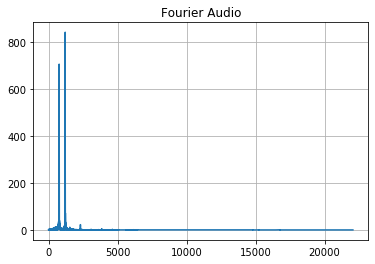

In [36]:
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Fourier Audio')